In [1]:
!pip install matplotlib pdf2image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.7/163.7 kB 478.4 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 7.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.0/322.0 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 10.5 MB/s eta 0:00:0000:010:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.4 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 8.4 MB/s eta 0:00:00


In [2]:
import easyocr
import matplotlib.pyplot as plt
from PIL import Image
from pdf2image import convert_from_path
import numpy as np
import os

In [44]:
reader = easyocr.Reader(['sah'],
                        model_storage_directory='sahOCR/model',
                        user_network_directory='sahOCR/user_network',
                        recog_network='custom_example',
                        gpu=True)

In [66]:
image_path = 'EasyOCR/trainer/all_data/sah_filtered/1.jpg'

if not os.path.isfile(image_path):
    print(f"Изображение по пути {image_path} не найдено.")
    exit()

In [73]:
image = Image.open(image_path).convert('RGB')

target_width = 600
target_height = 64
resized_image = image.resize((target_width, target_height), Image.BILINEAR)

image_np = np.array(resized_image)

result = reader.readtext(image_np)

In [74]:
# result = reader.readtext(image_path)

# # Открытие изображения и преобразование в оттенки серого
# image = Image.open(image_path).convert('L')  # 'L' для оттенков серого

# # Применение регулировки контраста
# image_np = np.array(image)
# image_np = adjust_contrast_grey(image_np, target=0.4)

# # Преобразование обратно в PIL Image (опционально, если необходимо)
# # image_processed = Image.fromarray(image_np, 'L')

# # Распознавание текста на обработанном изображении
# result = reader.readtext(image_np)

Текст: кабинеты | Достоверность: 0.5620873479894519


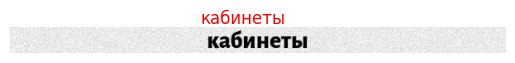

In [75]:
for detection in result:
    bbox, text, confidence = detection
    print(f"Текст: {text} | Достоверность: {confidence}")

    # Визуализация результатов (опционально)
    image = Image.open(image_path)
    plt.imshow(image)
    plt.text(bbox[0][0], bbox[0][1] - 10, text, fontsize=12, color='red')
    plt.axis('off')
    plt.show()

In [61]:
pdf_path = 'sahOCR/test_documents/36953_without_OCR.pdf'

In [62]:
images = convert_from_path(pdf_path, dpi=300, first_page=4, last_page=4)

Ширина: 1593px, Высота: 2297px


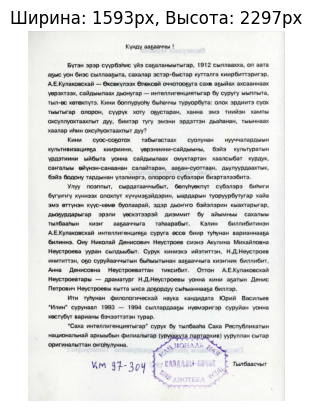

In [65]:
image = images[0]

# Получение размеров изображения
width, height = image.size

print(f"Ширина: {width}px, Высота: {height}px")

image_np = np.array(image)

plt.imshow(image)
plt.title(f"Ширина: {width}px, Высота: {height}px")
plt.axis('off')
plt.show()

In [32]:
result = reader.readtext(image_np)

In [33]:
# for detection in result:
#     bbox, text, confidence = detection
#     print(f"Текст: {text} | Достоверность: {confidence}")

#     # Визуализация результатов (опционально)
#     plt.imshow(image)
#     plt.text(bbox[0][0], bbox[0][1] - 10, text, fontsize=12, color='red')
#     plt.axis('off')
#     plt.show()